In [1]:
from coffea.util import load
import hist
import mplhep as hep
import matplotlib.pyplot as plt
import numpy

In [2]:
# f = load("outputs/jetclustering.coffea")
f0 = load("outputs/jetclustering-chunk0.coffea")
f1 = load("outputs/jetclustering-chunk1.coffea")
f2 = load("outputs/jetclustering-chunk2.coffea")

In [3]:
import copy

def get_subdict(dicts, key):
    '''
    Get list of subdictionaries(if available) from a list of dictionaries
    '''
    out = []
    for d in dicts:
        for k in d.keys():
            if key == k:
                out.append(d[key])
    return out

def accumulate(dicts):
    """
    Merges an array of dictionaries and adds up the values of common keys.

    Parameters:
    dicts (list): A list of dictionaries to be merged.

    Returns:
    dict: A dictionary with combined keys and values summed for common keys.
    """
    exception_list = ['Labels'] # These keys will not be repeated but included once.
    outdict = {}

    for diction in dicts:
        dictionary = copy.deepcopy(diction)

        for key, value in dictionary.items():
            # print(f"{key} : {value}")
            # print(type(value))

            if isinstance(value,dict):
                value = accumulate(get_subdict(dicts,key))
                outdict[key] = value
            else:
                if key in outdict.keys():
                    if key in exception_list:
                        pass
                    else:
                        outdict[key] += value  # Add values if the key is common
                else:
                    outdict[key] = value  # Otherwise, add the new key-value pair

    return outdict

f = accumulate([f0,f1,f2])

In [4]:
f

{'wzp6_ee_mumuH_Hbb_ecm240': {'histograms': {'sel': {'dijet_m': Hist(Regular(80, 70, 150, label='Axis 0'), storage=Double()) # Sum: 285667.0 (300000.0 with flow),
    'recoil': Hist(Regular(200, 120, 140, label='Axis 0'), storage=Double()) # Sum: 247578.0,
    'p_ll': Hist(Regular(50, 20, 70, label='Axis 0'), storage=Double()) # Sum: 247578.0,
    'm_ll': Hist(Regular(40, 70, 110, label='Axis 0'), storage=Double()) # Sum: 247578.0}},
  'cutflow': {'sel': {'Onecut': Hist(Integer(0, 8, name='onecut'), storage=Double()) # Sum: 2186186.0,
    'Cutflow': Hist(Integer(0, 8, name='cutflow'), storage=Double()) # Sum: 2142080.0,
    'Labels': ['initial',
     'n_gte_2_Muons',
     'm_gt_70_Z',
     'm_lt_100_Z',
     'p_gt_20_Z',
     'p_lt_70_Z',
     'm_gt_120_Recoil',
     'm_lt_140_Recoil']}}}}

In [6]:
z = f['wzp6_ee_mumuH_Hbb_ecm240']['histograms']['sel']
jet = f['wzp6_ee_mumuH_Hbb_ecm240']['histograms']['sel']

In [16]:
z

{'dijet_m': Hist(Regular(80, 70, 150, label='Axis 0'), storage=Double()) # Sum: 285667.0 (300000.0 with flow),
 'recoil': Hist(Regular(200, 120, 140, label='Axis 0'), storage=Double()) # Sum: 247578.0,
 'p_ll': Hist(Regular(50, 20, 70, label='Axis 0'), storage=Double()) # Sum: 247578.0,
 'm_ll': Hist(Regular(40, 70, 110, label='Axis 0'), storage=Double()) # Sum: 247578.0}

In [11]:
import numpy as np
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
cross_sections = {#in pb-1 # Taken as is from FCC events catalogue at https://fcc-physics-events.web.cern.ch/FCCee/spring2021/Delphesevents_IDEA.php
    'wzp6_ee_mumuH_Hbb_ecm240': 0.00394,
}
intLumi = 7.2e+06 #in pb-1
def get_xsec_scale(dataset, raw_events, Luminosity):
    '''
    Get final scale factor from cross section
    '''
    xsec = cross_sections[dataset] #in per picobarn
    if raw_events > 0:
        sf = (xsec*Luminosity)/raw_events
    else :
        raise ValueError('Raw events less than of equal to zero!')
    return round(float(sf),3)

def makeplot(fig, ax, hist, name, title, label, xlabel, ylabel, bins, xmin, xmax, log, stack, color, histtype, xticks=10, cutflow_mode=False):
    '''
    Makes a single kinematic plot on an ax object
    '''
    hep.histplot(
        hist,
        yerr=0,
        histtype=histtype,
        label=label,
        color=color,
        alpha=0.8,
        stack=stack,
        edgecolor='black',
        linewidth=1,
        sort='yield',
        ax=ax
    )

    ax.text(0.27, 1.02, 'FCC Analyses: FCC-ee Simulation (Delphes)', fontsize=9, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.text(0.92, 1.02, f'$\\sqrt{{s}} = 240 GeV$', fontsize=9, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

    if  cutflow_mode:
        ax.set_ylabel(ylabel)
    else:
        per_bin = '/'+str((xmax-xmin)/bins)
        ax.set_ylabel(ylabel+per_bin+' [GeV]')
        plt.xlim([xmin,xmax])
        plt.xticks(np.linspace(xmin,xmax,xticks+1))
        ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.set_xlabel(xlabel)

    if log :
        ax.set_yscale('log')
        plt.tick_params(axis='y', which='minor')
    else:
        ax.yaxis.set_minor_locator(AutoMinorLocator(5))

    ax.set_title(title,pad=25,  fontsize= "15", color="#192655")


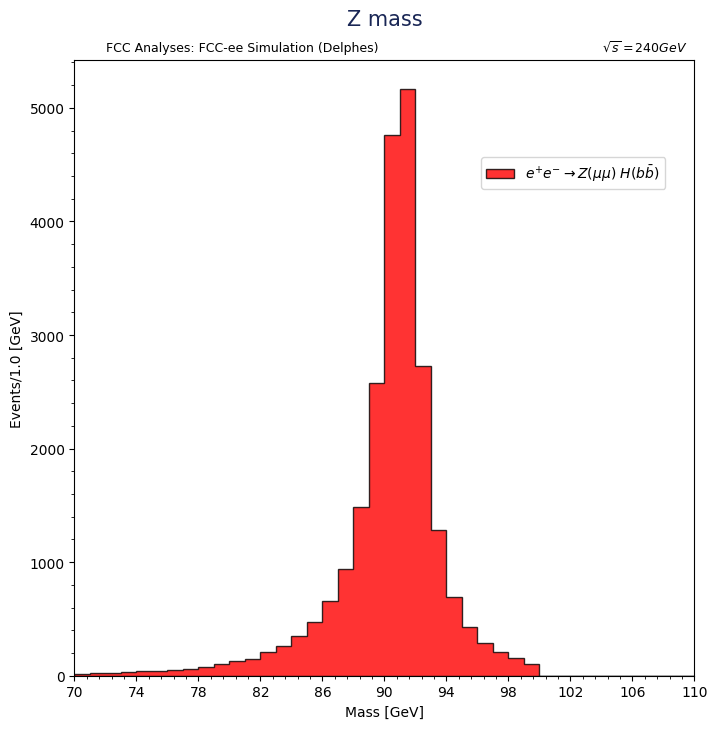

In [12]:
fig, ax = plt.subplots(figsize=(8,8))
makeplot(
    fig,ax,z['m_ll']*get_xsec_scale('wzp6_ee_mumuH_Hbb_ecm240', 300000, intLumi),
    "Z_mass",
    "Z mass",
    "$e^{+}e^{-} \\rightarrow Z(\\mu \\mu) \\ H(b\\bar{b})$",
    "Mass [GeV]",
    "Events",
    40,
    70,
    110,
    False,
    False,
    'r',
    'fill'
)
fig.legend(prop={"size":10},loc= (0.67,0.74) );
fig.savefig("Z_mass.png", dpi=240)

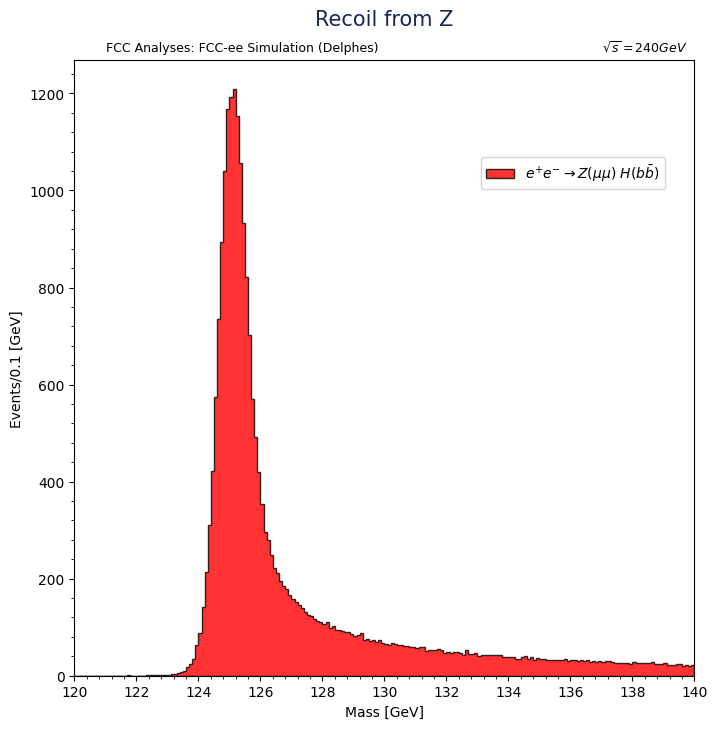

In [13]:
fig, ax = plt.subplots(figsize=(8,8))
makeplot(
    fig,ax,z['recoil']*get_xsec_scale('wzp6_ee_mumuH_Hbb_ecm240', 300000, intLumi),
    "Z_Recoil",
    "Recoil from Z",
    "$e^{+}e^{-} \\rightarrow Z(\\mu \\mu) \\ H(b\\bar{b})$",
    "Mass [GeV]",
    "Events",
    200,
    120,
    140,
    False,
    False,
    'r',
    'fill'
)
fig.legend(prop={"size":10},loc= (0.67,0.74) );
fig.savefig("Recoil.png", dpi=240)

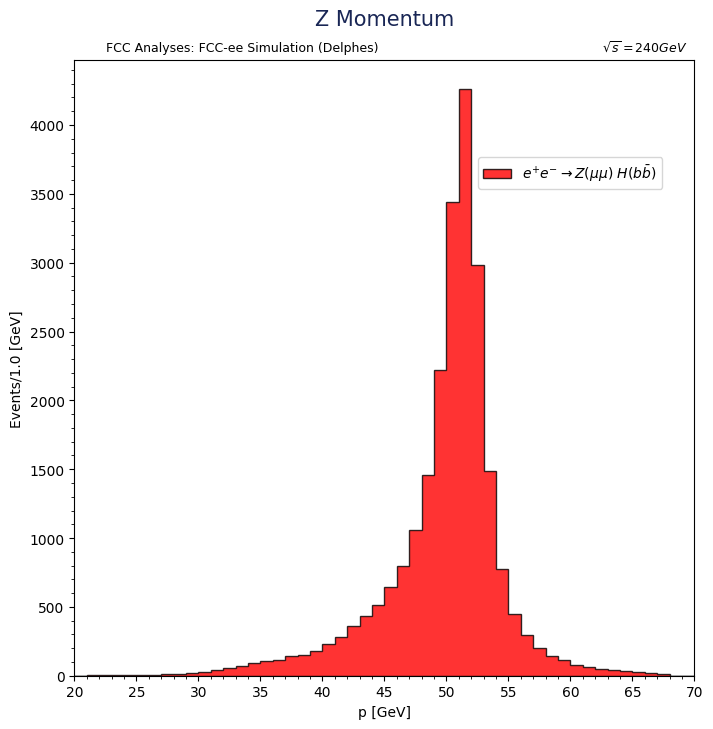

In [14]:
fig, ax = plt.subplots(figsize=(8,8))
makeplot(
    fig,ax,z['p_ll']*get_xsec_scale('wzp6_ee_mumuH_Hbb_ecm240', 300000, intLumi),
    "Z_p",
    "Z Momentum",
    "$e^{+}e^{-} \\rightarrow Z(\\mu \\mu) \\ H(b\\bar{b})$",
    "p [GeV]",
    "Events",
    50,
    20,
    70,
    False,
    False,
    'r',
    'fill'
)
fig.legend(prop={"size":10},loc= (0.67,0.74) );
fig.savefig("Z_momentum.png", dpi=240)

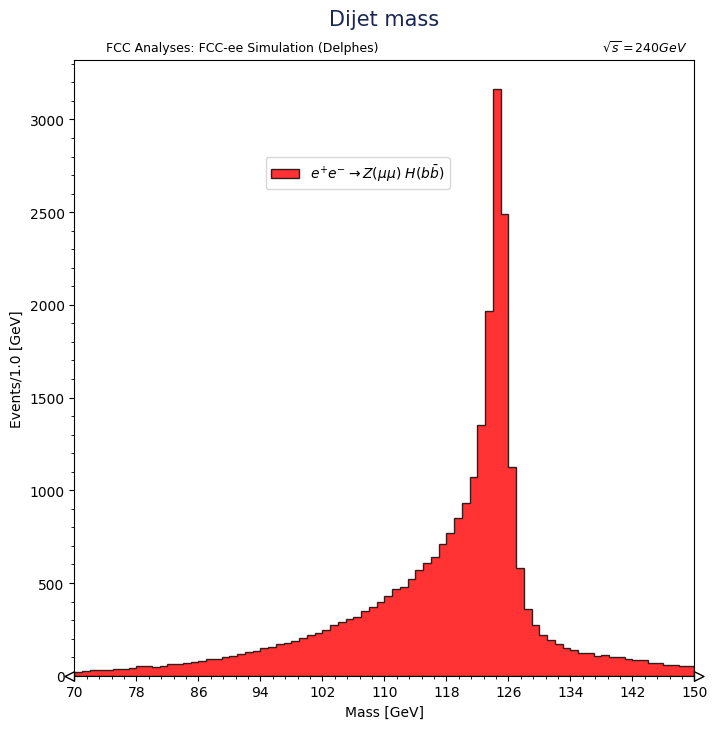

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
makeplot(
    fig,ax,z['dijet_m']*get_xsec_scale('wzp6_ee_mumuH_Hbb_ecm240', 300000, intLumi),
    "dijet_m",
    "Dijet mass",
    "$e^{+}e^{-} \\rightarrow Z(\\mu \\mu) \\ H(b\\bar{b})$",
    "Mass [GeV]",
    "Events",
    80,
    70,
    150,
    False,
    False,
    'r',
    'fill'
)
fig.legend(prop={"size":10},loc= (0.37,0.74) );
fig.savefig("Dijet_mass.png", dpi=240)